In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
import statsmodels
from tqdm import tqdm

import ptd_regression

# Load data (MOSAIKS): Housing price vs income, nightlights, road length

Data is from Rolf et al (2021): https://github.com/Global-Policy-Lab/mosaiks-paper

In [2]:
file_path = "data/MOSAIKS/outcomes_scatter_obsAndPred_housing_log_price_per_sqft_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
housing_data = pd.DataFrame.from_dict(data, orient='index').T

file_path = "data/MOSAIKS/outcomes_testset_obsAndPred_housing_log_price_per_sqft_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame.from_dict(data, orient='index').T
housing_data = pd.concat([housing_data, data])

housing_data = housing_data.rename(columns={"truth": "truth_housing", "preds": "preds_housing"})
housing_data = housing_data[['truth_housing', 'preds_housing', 'lon', 'lat']]

In [3]:
file_path = "data/MOSAIKS/outcomes_scatter_obsAndPred_income_income_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
income_data = pd.DataFrame.from_dict(data, orient='index').T

file_path = "data/MOSAIKS/outcomes_testset_obsAndPred_income_income_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame.from_dict(data, orient='index').T
income_data = pd.concat([income_data, data])

income_data = income_data.rename(columns={"truth": "truth_income", "preds": "preds_income"})
income_data = income_data[['truth_income', 'preds_income', 'lon', 'lat']]

In [4]:
file_path = "data/MOSAIKS/outcomes_scatter_obsAndPred_nightlights_log_nightlights_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
nightlights_data = pd.DataFrame.from_dict(data, orient='index').T

file_path = "data/MOSAIKS/outcomes_testset_obsAndPred_nightlights_log_nightlights_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame.from_dict(data, orient='index').T
nightlights_data = pd.concat([nightlights_data, data])

nightlights_data = nightlights_data.rename(columns={"truth": "truth_nightlights", "preds": "preds_nightlights"})
nightlights_data = nightlights_data[['truth_nightlights', 'preds_nightlights', 'lon', 'lat']]

In [5]:
file_path = "data/MOSAIKS/outcomes_scatter_obsAndPred_roads_length_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
roads_data = pd.DataFrame.from_dict(data, orient='index').T

file_path = "data/MOSAIKS/outcomes_testset_obsAndPred_roads_length_CONTUS_16_640_POP_100000_0_random_features_3_0.data"
with open(file_path, 'rb') as file:
    data = pickle.load(file)
data = pd.DataFrame.from_dict(data, orient='index').T
roads_data = pd.concat([roads_data, data])

roads_data = roads_data.rename(columns={"truth": "truth_roadlength", "preds": "preds_roadlength"})
roads_data = roads_data[['truth_roadlength', 'preds_roadlength', 'lon', 'lat']]

In [6]:
data = pd.merge(housing_data, income_data, on=['lon', 'lat'])
data = pd.merge(data, nightlights_data, on=['lon', 'lat'])
data = pd.merge(data, roads_data, on=['lon', 'lat'])

In [7]:
data

,truth_housing,preds_housing,lon,lat,truth_income,preds_income,truth_nightlights,preds_nightlights,truth_roadlength,preds_roadlength
0,5.569270,4.983138,-87.690467,41.973536,58975.317230,48362.329992,4.942057,5.051114,5757.889000,3566.867665
1,5.209124,4.838448,-105.043738,40.555465,69218.708312,60420.921719,3.444160,3.640272,4735.976000,6009.888234
2,3.556411,3.852630,-95.334170,30.042441,60684.709504,53535.106435,2.572312,2.767318,1382.492030,2484.412714
3,3.531363,3.965836,-95.609618,29.672188,53573.601952,71155.021200,3.709977,3.232113,1936.493256,1014.949222
4,4.992671,4.775155,-114.959893,36.062708,48913.024875,58011.945327,2.631002,2.936915,13929.147271,7028.270748
...,...,...,...,...,...,...,...,...,...,...
46413,6.531769,6.494433,-118.444320,33.999300,80399.713483,111520.665856,3.533586,3.406601,4215.154601,6849.016471
46414,4.740169,4.632964,-93.529980,41.624481,75225.521325,59757.816508,2.597538,2.739110,5494.383000,5901.127095
46415,5.028208,4.795526,-71.163542,42.228980,92358.885129,71189.889211,2.846066,2.827334,6985.534000,6773.564891
46416,4.497587,4.705362,-71.025817,42.034936,97451.615554,95616.516192,1.772057,1.891543,4824.782000,5172.207123


In [8]:
truth_Y = np.array(data['truth_housing']).reshape(-1, 1)
preds_Y = np.array(data['truth_housing']).reshape(-1, 1)

truth_X = np.array(data[['truth_income', 'truth_nightlights', 'truth_roadlength']])
preds_X = np.array(data[['truth_income', 'preds_nightlights', 'preds_roadlength']])

# TRUE THETA
true_coeff = OLS(truth_Y, exog=statsmodels.tools.add_constant(truth_X)).fit().params
print(true_coeff)

[ 3.61869782e+00  1.16911550e-05  1.18176737e-01 -1.04107239e-05]


In [9]:
# THETA FROM PREDICTED X and Y
map_only_coeff = OLS(preds_Y, exog=statsmodels.tools.add_constant(preds_X)).fit().params
print(map_only_coeff)

[ 3.56696128e+00  1.16742732e-05  1.48836145e-01 -1.71082495e-05]


# PTD bootstrap with linear regression

In [10]:
from importlib import reload
import ptd_regression
reload(ptd_regression)

np.random.seed(seed=0)

map_only_ci = ptd_regression.classical_ols_ci(preds_X, preds_Y, alpha=0.05)
map_only_estimates = 0.5*(map_only_ci[0] + map_only_ci[1])
map_only_widths = map_only_ci[1] - map_only_ci[0]

classical_estimates = []
classical_ci_widths = []
classical_ci_contains_true_theta = []

ppi_estimates = []
ppi_ci_widths = []
ppi_ci_contains_true_theta = []

for i in tqdm(range(100)):
    calibration_indices = np.random.choice(np.arange(0, len(data)), size=500, replace=False)
    
    # add constant column to covariates for intercept term
    X = statsmodels.tools.add_constant(truth_X[calibration_indices])
    Xhat = statsmodels.tools.add_constant(preds_X[calibration_indices])
    Xhat_unlabeled = statsmodels.tools.add_constant(np.delete(preds_X, calibration_indices, axis=0)) # all entries except calibration indices
    
    Y = truth_Y[calibration_indices]
    Yhat = preds_Y[calibration_indices]
    Yhat_unlabeled = np.delete(preds_Y, calibration_indices, axis=0) # all entries except calibration indices
    
    tuning_matrix, ptd_pointestimate, ppi_ci = ptd_regression.ptd_ols(X, Xhat, Xhat_unlabeled, Y, Yhat, Yhat_unlabeled, 
                                                                      B=200, alpha=0.05, tuning_method=None)
    classical_ci = ptd_regression.classical_ols_ci(X, Y, alpha=0.05)
    
    ppi_estimates.append(ptd_pointestimate)
    classical_estimates.append(0.5*(classical_ci[0] + classical_ci[1]))
    
    ppi_ci_widths.append(ppi_ci[1] - ppi_ci[0])
    classical_ci_widths.append(classical_ci[1] - classical_ci[0])
    
    ppi_ci_contains_true_theta.append(np.logical_and(np.greater(true_coeff, ppi_ci[0]), np.less(true_coeff, ppi_ci[1])))
    classical_ci_contains_true_theta.append(np.logical_and(np.greater(true_coeff, classical_ci[0]), np.less(true_coeff, classical_ci[1])))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:59<00:00,  1.79s/it]


In [11]:
# Coverage of each parameter (should be close to 95% for both classical and PPI)
print(np.array(classical_ci_contains_true_theta).mean(axis=0))
print(np.array(ppi_ci_contains_true_theta).mean(axis=0))

[0.94 0.96 0.96 0.97]
[0.96 0.99 0.93 0.94]


In [12]:
covariates = ['Intercept', 'Income', 'Nightlights', 'Road Length']
classical_dict = {}
ppi_dict = {}
for i in range(len(covariates)):
    covariate = covariates[i]
    classical_dict[f"{covariate} Coeff Estimate"] = np.array(classical_estimates)[:, i]
    classical_dict[f"{covariate} CI width"] = np.array(classical_ci_widths)[:, i]
    ppi_dict[f"{covariate} Coeff Estimate"] = np.array(ppi_estimates)[:, i]
    ppi_dict[f"{covariate} CI width"] = np.array(ppi_ci_widths)[:, i]
    
classical_df = pd.DataFrame(classical_dict)
classical_df['Method'] = 'Classical'

ppi_df = pd.DataFrame(ppi_dict)
ppi_df['Method'] = 'PPI'

df = pd.concat([classical_df, ppi_df], ignore_index=True)

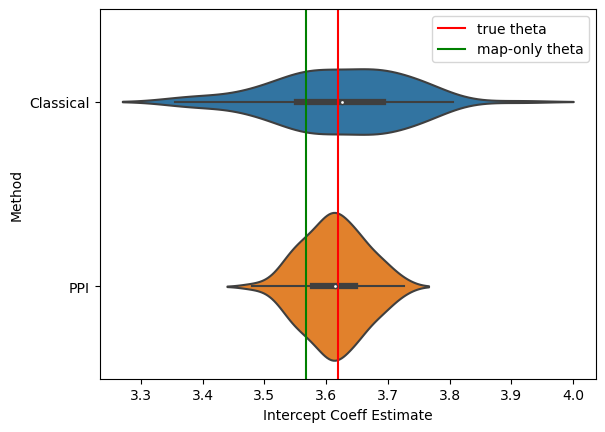

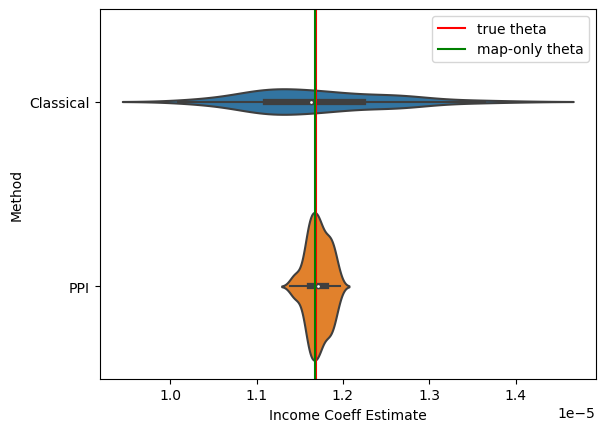

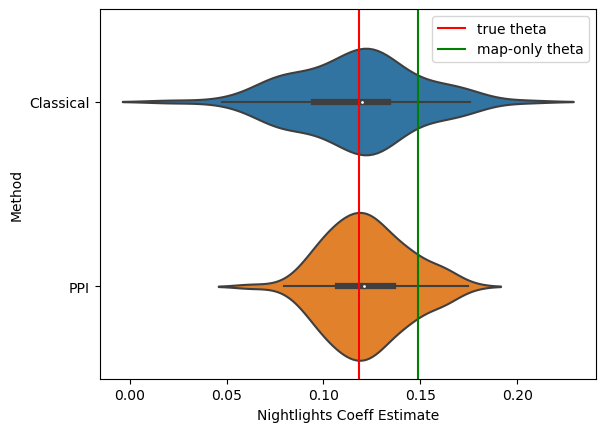

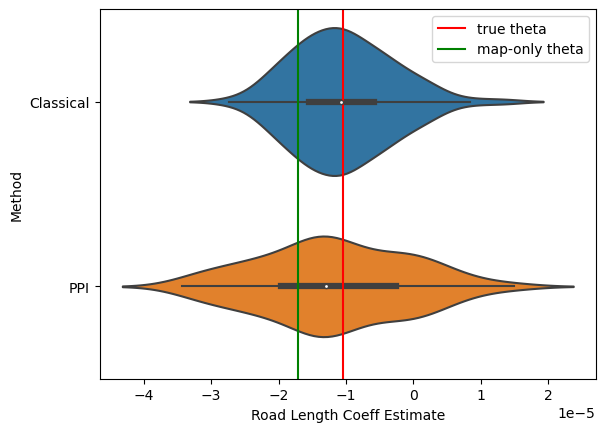

In [13]:
for i in range(len(covariates)): 
    covariate = covariates[i]
    
    sns.violinplot(data=df, x=f"{covariate} Coeff Estimate", y="Method")
    plt.axvline(true_coeff[i], color='red', label='true theta')
    plt.axvline(map_only_coeff[i], color='green', label='map-only theta')
    plt.legend()
    plt.show()

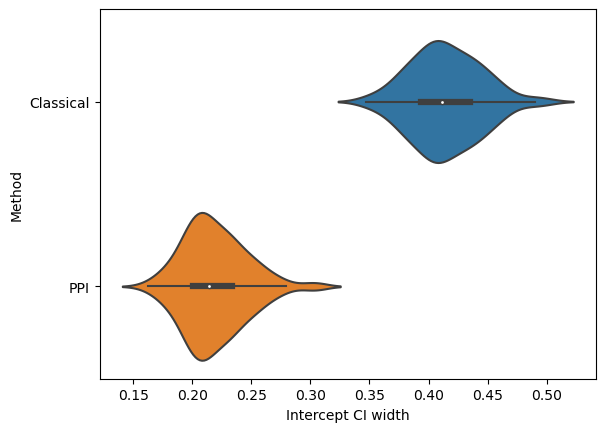

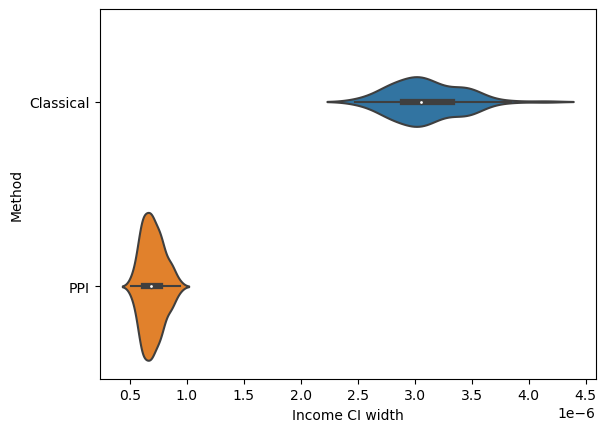

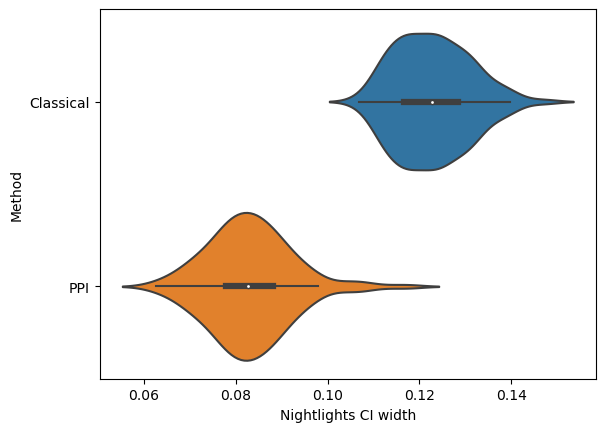

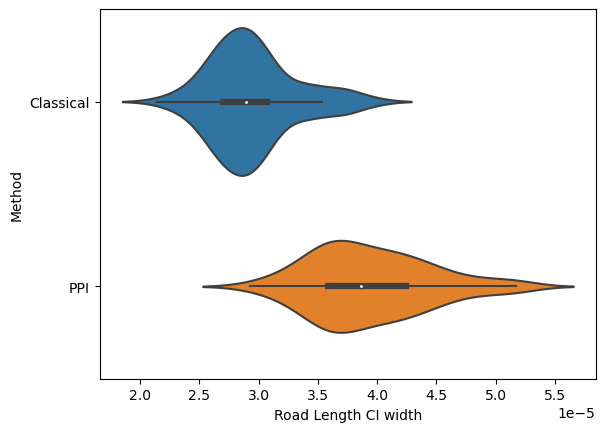

In [14]:
for i in range(len(covariates)): 
    covariate = covariates[i]
    sns.violinplot(data=df, x=f"{covariate} CI width", y="Method")
    plt.show()